#Airplane Accident severity prediction

**Importing the libraries**

In [2]:
import pandas as pd     #importing pandas for data analysis
import numpy as np       #importing numpy for working with multidimensional arrays
import matplotlib.pyplot as plt   #importing matplotlib for visualization

**Importing the dataset**

In [3]:
dataset = pd.read_csv('AirplaneAccident.csv')

**Checking if there is any missing values in the dataset**

In [4]:
dataset.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

**Converting the 'severity' column into interger value and storing it in a new column 'class'**

In [5]:


dataset['class']=dataset['Severity'].map({'Highly_Fatal_And_Damaging':0,'Significant_Damage_And_Serious_Injuries':1,'Minor_Damage_And_Injuries':2,'Significant_Damage_And_Fatalities':3})



**Dropping the severity column and printing the first five rows of the dataset**

In [6]:
dataset.drop('Severity',axis=1,inplace=True)
dataset.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,class
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,2
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,2
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,3
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,1
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,3


**Pairplot to visualize the relationship between independent variables and dependent variable 'class'.Here I did pairs of features and plotted them all.** 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


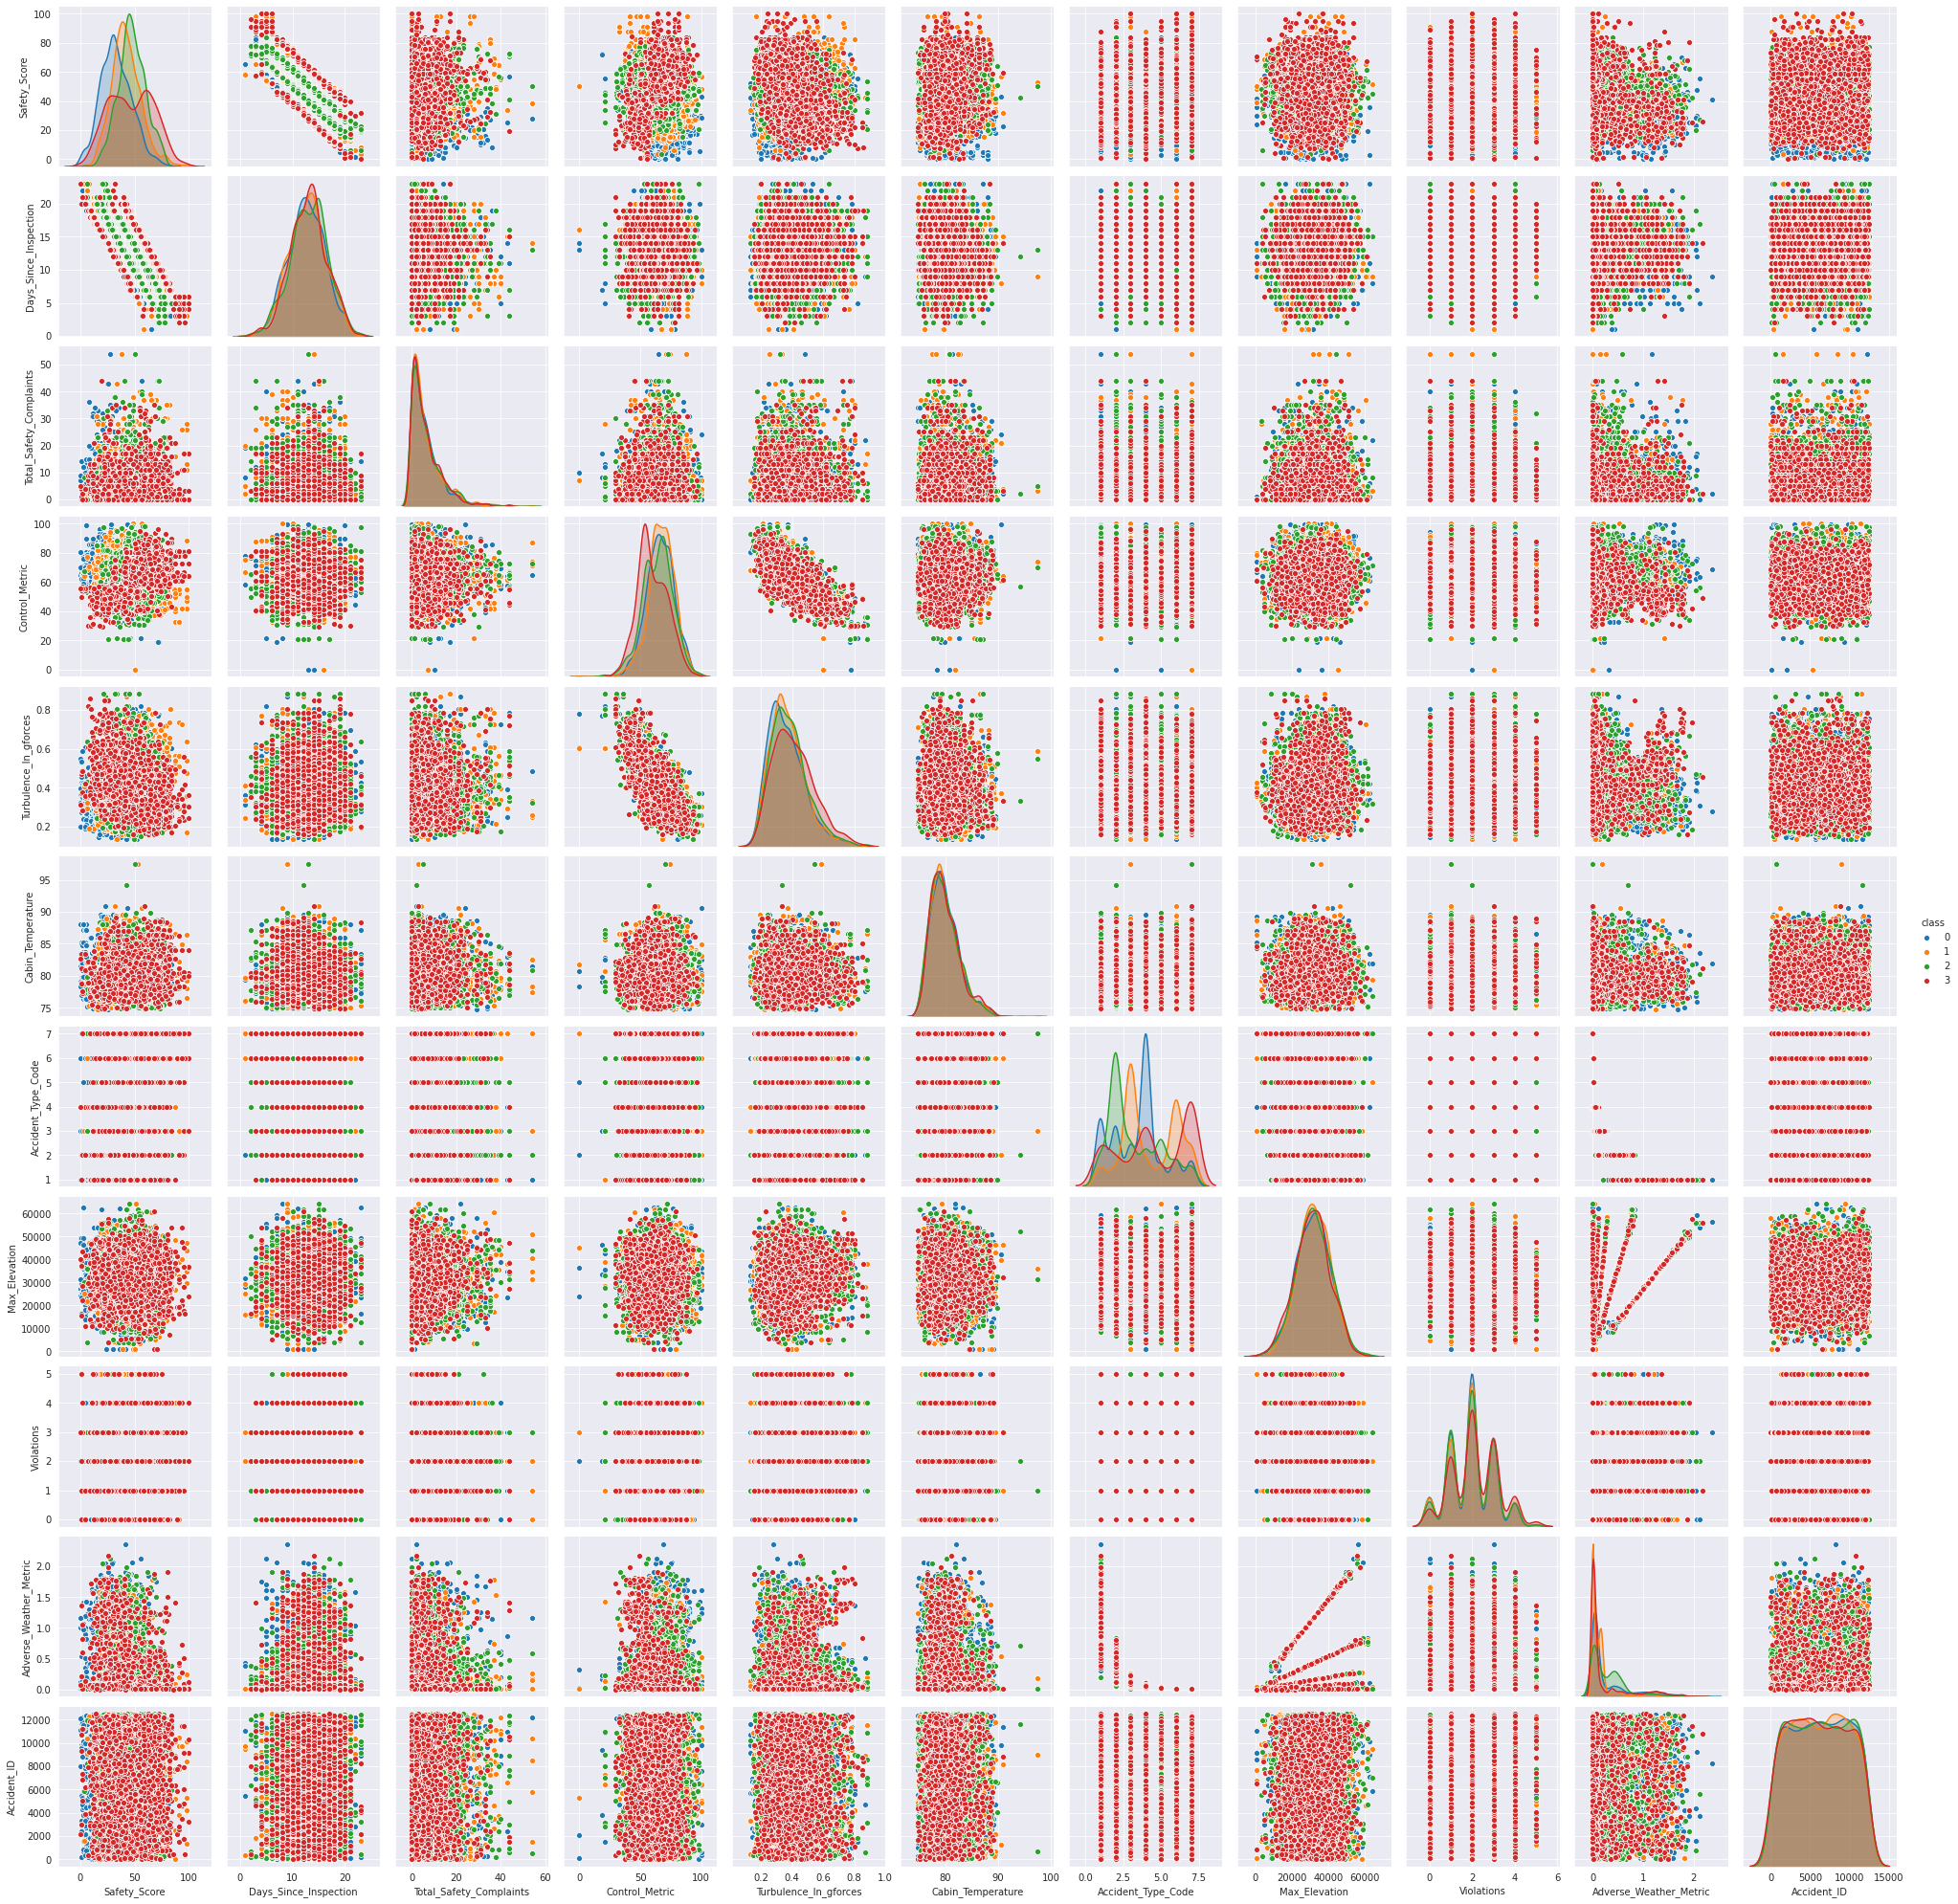

In [7]:
import seaborn as sns    #Importing the seaborn library for visualization
sns.set_style("darkgrid");   #grid view with dark background
sns.pairplot(dataset,hue='class')
plt.show()

**Dividing the dataset into dependent and independent variable.** 
Here in the independent variable we have ommitted the 'Accident_ID' column as this is not relevant for the prediction of severity.

In [8]:
x = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -1].values

**Printing the independent variable x**

In [9]:
print(x)

[[4.92237443e+01 1.40000000e+01 2.20000000e+01 ... 3.13354768e+04
  3.00000000e+00 4.24352083e-01]
 [6.24657534e+01 1.00000000e+01 2.70000000e+01 ... 2.60247111e+04
  2.00000000e+00 3.52349973e-01]
 [6.30593607e+01 1.30000000e+01 1.60000000e+01 ... 3.92690539e+04
  3.00000000e+00 3.36390700e-03]
 ...
 [2.78538813e+01 1.70000000e+01 1.00000000e+00 ... 3.37719963e+04
  3.00000000e+00 1.68173043e-01]
 [5.62100457e+01 8.00000000e+00 0.00000000e+00 ... 3.98204192e+04
  2.00000000e+00 2.63809290e-02]
 [5.00000000e+01 1.30000000e+01 3.00000000e+00 ... 2.60053230e+04
  2.00000000e+00 1.70358910e-02]]


**Printing the dependent variable y**

In [10]:
print(y)

[2 2 3 ... 1 2 0]


**Importing the train_test_split function from sklearn.model_selection library to split the dataset into two subsets Training set and Test set.**

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=1)

**Printing the x_train,x_test,y_train and y_test**

In [12]:
print(x_train)

[[4.43378995e+01 1.50000000e+01 3.00000000e+00 ... 3.07014904e+04
  1.00000000e+00 4.15919627e-01]
 [3.64383562e+01 1.70000000e+01 1.00000000e+00 ... 3.89763407e+04
  0.00000000e+00 5.27487411e-01]
 [3.39726027e+01 1.10000000e+01 2.00000000e+00 ... 1.74172482e+04
  2.00000000e+00 3.20805080e-02]
 ...
 [2.18721461e+01 1.50000000e+01 9.00000000e+00 ... 4.84374401e+04
  3.00000000e+00 1.79913125e+00]
 [6.80365297e+01 1.20000000e+01 1.00000000e+00 ... 1.51800318e+04
  2.00000000e+00 1.48033400e-03]
 [3.09132420e+01 1.20000000e+01 1.00000000e+00 ... 2.31572982e+04
  2.00000000e+00 4.23891340e-02]]


In [13]:
print(x_test)


[[2.46118721e+01 2.20000000e+01 4.00000000e+00 ... 1.39455729e+04
  1.00000000e+00 1.41891100e-03]
 [4.70319635e+01 1.40000000e+01 1.30000000e+01 ... 4.98812704e+04
  2.00000000e+00 6.68862533e-01]
 [3.47945206e+01 1.10000000e+01 1.00000000e+01 ... 2.39994411e+04
  2.00000000e+00 1.20797848e-01]
 ...
 [6.53424658e+01 1.00000000e+00 8.00000000e+00 ... 2.81833231e+04
  2.00000000e+00 3.82453188e-01]
 [2.47031963e+01 1.70000000e+01 1.20000000e+01 ... 2.17205738e+04
  2.00000000e+00 1.94914600e-03]
 [3.64383562e+01 1.10000000e+01 2.00000000e+00 ... 2.69023188e+04
  2.00000000e+00 3.64323086e-01]]


In [14]:
print(y_test)

[2 2 0 ... 0 1 0]


In [15]:
print(y_train)

[0 2 0 ... 3 3 0]


**Feature scaling (here standardising) x_test and x_train**

In [16]:
from sklearn.preprocessing import StandardScaler   #Importing StandardScaler function from sklearn.preprocessing module
sc= StandardScaler()     
x_train[:, :-2]= sc.fit_transform(x_train[:, :-2])
x_test[:, :-2]= sc.transform(x_test[:, :-2])

**Importing lightgbm library and training the model.I have used LGBMClassifier as it improves accuracy**

In [17]:
  import lightgbm as ltb
  model = ltb.LGBMClassifier()
  model.fit(x_train, y_train)
  



LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Predicting the dependent variable after training the LGBM model**

In [18]:
  expected_y  = y_test
  y_pred = model.predict(x_test)

**Printing the predicted value of severity**

In [19]:
print(y_pred)

[2 2 0 ... 0 3 0]


**Importing the confusion matrix and accuracy_score methods from sklearn.metrics library to calculate the confusion matrics and accuracy_score.**

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[591  10   6  11]
 [  8 497  20   6]
 [ 10  10 485   2]
 [  7   7   3 327]]


0.95

**Importing the k-fold cross validation method from sklearn.model_selection for checking the accuracy for 10 folds of test set and calculating the mean accuracy and standard deviation of accuracy for 10 folds of test set.**

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.16 %
Standard Deviation: 0.92 %


# Light GBM is a gradient boosting framework that uses tree based learning algorithm. The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed.

Advantages of Light GBM-
1. Faster training speed and higher efficiency.

2. Lower memory usage.

3. Better accuracy.

4. Support of parallel and GPU learning.

5. Capable of handling large-scale data.



**Observing the pairplot visualisations, I trained the model using K-Nearest Neighbours, Decision Tree, Random Forest, XGBoost, bagclassifier and Light GBM classifier but Light GBM gave better results in predicting Severity of Airplane Accident. I used LGBMClassifier() because the value to be predicted is categorical and therefore performing classification would be appropriate. This model worked well with the dataset and hence helped me in achieving an accuracy of 95.16 %.**

**I have visualized the dataset using pairplot from seaborn library.I have predicted the 'severity' using LGBMClassifier method and obtained an accuracy of 0.95 and then applied K-fold cross validation to enhance the accuracy and got the mean accuracy for 10 test set as 95.16% and standard deviation of accuracy for 10 test set as 0.92.I have also calculated and printed the confusion matrix.**


**LightGBM is prefixed as 'Light' because of its high speed. LightGBM can handle the large size of data and takes lower memory to run.As it was a large dataset, so I used LightGBM**